---
title: "Neural Networks Test"
author: "Srusti Donapati"
date: "2023-06-23"
categories: [blog]
---

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

Hidden Layer 1:
torch.nn.Linear(4,6) #means 4 features going into the input layer, and 6 features coming out in the first hidden layer through linear transformation
After getting the 6 outputs in the first hidden layer, you activate by applying non-linearity (does not change the shape, so if the output in the first hidden layer is (1,6), it will remain (1,6))

Hidden Layer 2:
torch.nn.Linear(6,5)

Output Layer:
torch.nn.Linear(5,3)

Activation:
For categorical/probabilities, use the following for activation:
y = torch.nn.signoid()

For linear regression:
y = torch.nn.tanh

In [3]:
#Code for defining neural networks:
#class MyNeural(nn.Module):
    #def __init__(self, numberfeatures, hiddenlayer1, hiddenlayer2, hiddenlayer3, numberofoutputs):
        #super(MyNeural, self).__init__()
        #self.hL1 = nn.Linear(numberfeatures, hiddenlayer1) #(so if you want to take in 4 and output 6 neurons in HL1, it is (4,6))
        #self.hL2 = nn.Linear(hiddenlayer1, hiddenlayer2) #Linear creates fully connected layers, where each neuron is connected to every neuron in the previous layer
        #self.hL3 = nn.Linear(hiddenlayer2, hiddenlayer3)
        #self.out = nn.Linear(hiddenlayer2, numberofoutputs)
        #self.activationfunction = nn.ReLU() #reLu is an activation function which takes any number you put into it 
        #(from hidden layer 1 or hidden layer 2), and if any of those numbers is negative, 
        #it turns them into positive, and if they are positive, it retains it
        #activation functions introduce non-linearities, allowing the model to learn complex relationships in the data
        #self.sig = nn.Sigmoid() #sigmoid is another activation function (here we are defining the output function)

    #def forward(self, x): #where x is the number of features you want to put in (the input data)
        #x = self.hL1(x)
        #x = self.activationfunction(x) #nonlinearity function which goes into hidden layer 2
        #x = self.hL2(x)
        #x = self.activationfunction(x) #call activation function after every hidden layer to allow complexities to be understood by model
        #x = self.hL3(x)
        #y = self.sig(x) #calling sig because sigmoid is used for predicting probabilities (categories, like iris dataset)
        #return(y) #y is the predicted output of the neural network

In [4]:
class MyNeural(nn.Module):
    def __init__(self, input, hidden_layers, output):
        super().__init__()
        self.inputLayer = torch.nn.Linear(input, hidden_layers[0])
        self.hlayers = torch.nn.ModuleDict(
            {f"hL{i}": torch.nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers) - 1)}
        )
        self.outputLayer = torch.nn.Linear(hidden_layers[-1], output)
        self.s = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.inputLayer(x))
        for name, layer in self.hlayers.items():
            x = F.relu(layer(x))
        x = self.outputLayer(x)
        y = self.s(x)
        return y

Types of Datasets
For categories which describe in text (e.g. iris dataset), it is a 2D matrix with categories (e.g. animal) and features (e.g. fur, color, size, etc)

For the training, there are the following: Optimizer, Loss Function, Number of Epochs, how the data is fed, batches

Batches split the training examples into groups, so 64 examples in each group, and there are 5 groups for example
    64 examples go into the NN, get some values, and get backpropagated, and each and every batch individually goes through the NN in each epoch
    The batches are a random amount of training examples

An algorithm or method used to adjust the parameters of the model during the training process in order to minimize the loss
Examples of optimizers are SGD, Adam, etc

An epoch means you train that number of times, so if epochs = 30, you are training 30 times
An epoch is one pass through your entire training data
The iteration depends on how many batches you have

In [112]:
iris = datasets.load_iris()
data = iris.data #assigning data (data represents features)
target = iris.target #assigning target (which are class labels)

trainD, testD, trainT, testT = train_test_split(data, target, test_size=0.1, random_state=42) 
#splitting the dataset into training and test sets
#10% of the data is allocated for testing
#random_state is just some arbitrary parameter that, when set again, will ensure the same random splits in data are used
tTrainD = torch.from_numpy(trainD).float() #training data
tTrainT = torch.from_numpy(trainT).long() #training targets
tTestD = torch.from_numpy(testD).float() #testing data
tTestT = torch.from_numpy(testT).long() #testing targets

In [113]:

#dataset object
class myDataset():
    def __init__(self, x, y): #initialize by putting in the dataset, which is 1 million by 4 for the iris dataset
        self.x = x
        self.y = y
    def __len__(self): #pytorch will look at the length (the number of rows)
        length_ml = self.x.shape[0]
        return(length_ml)
    def __getitem__(self, idx): # says how to I source one training item and return it back to you, and the next time you call this function,
        #it is going to select a different training item (keeping the training items it already used in its memory)
        return (self.x[idx, :], self.y[idx])

In [114]:
trainDataset = myDataset(tTrainD, tTrainT)
trainDataset

After putting in the x and y and creating the object, MyLoader...

In [115]:
train_loader = DataLoader(trainDataset, batch_size=8, shuffle=True)
train_loader

In [124]:
#name of my neural network
myNN = MyNeural(4, [40, 60, 50, 30, 20], 3)
myNN

MyNeural(
  (inputLayer): Linear(in_features=4, out_features=40, bias=True)
  (hlayers): ModuleDict(
    (hL0): Linear(in_features=40, out_features=60, bias=True)
    (hL1): Linear(in_features=60, out_features=50, bias=True)
    (hL2): Linear(in_features=50, out_features=30, bias=True)
    (hL3): Linear(in_features=30, out_features=20, bias=True)
  )
  (outputLayer): Linear(in_features=20, out_features=3, bias=True)
  (s): Sigmoid()
)

In [125]:
opt = torch.optim.SGD(myNN.parameters(), lr = 0.01)
lossfunction = nn.CrossEntropyLoss()

In [126]:
num_epochs = 50000
train_loss = []
test_loss = []

for epoch in range(num_epochs):
    myNN.train()
    running_loss = 0
    dt_size = 0
    for i, (batchX, batchY) in enumerate(train_loader):
        opt.zero_grad()
        output = myNN(batchX)
        loss = lossfunction(output, batchY)
        loss.backward()
        opt.step()
        running_loss += loss.item() * batchX.size(0)
        dt_size += batchX.size(0)
    train_loss.append(running_loss / dt_size)
    #print(f'epoch {epoch}: train loss {iter_loss/(i+1)}')

    myNN.eval()
    with torch.no_grad():
        p = myNN(tTestD)
        l = lossfunction(p, tTestT)
        test_loss.append(l.item())


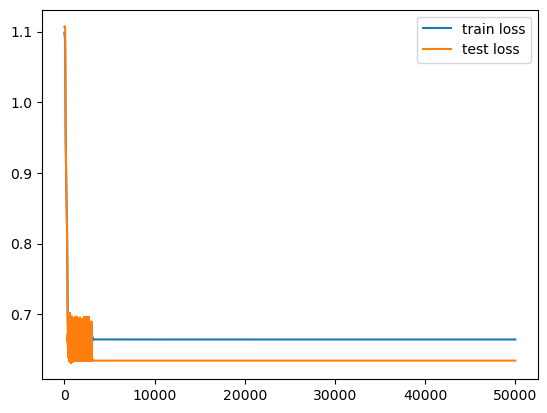

In [127]:
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label = 'test loss')
plt.legend()

In [128]:
#testing NN

print("testing")
opt.zero_grad()
output = myNN(tTestD)
print(tTestD.shape)
loss = lossfunction(output, tTestT)

testing
torch.Size([15, 4])


In [129]:
#analyzing and printing results for one epoch

preds = []
for row in output:
    if row.max() == row[0]:
        preds.append(0)
    elif row.max() == row[1]:
        preds.append(1)
    else:
        preds.append(2)
tPreds = torch.tensor(preds).view(15,1)
tTargets = tTestT.view(15,1)

result = torch.cat([tPreds,tTargets], dim=1)
print(result)
correct = 0
for row in result:
    if row[0] == row[1]:
        correct += 1

print(correct)

tensor([[1, 1],
        [0, 0],
        [1, 2],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [1, 2],
        [1, 1],
        [1, 1],
        [1, 2],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])
12
